
# Сервис аренды самокатов GoFast

## Цель проекта: 
Проверка гипотез для бизнеса относительно пользователей с подпиской и без.


    
План исследования:
1. [Предобработка данных. Изменить типы данных, где это необходимо. Найти пропущенные данные или дубликаты, скорректировать их при необходимости](#section1_id)

2. Исследовательский анализ данных:

[частота встречаемости по городам](#section2_id), 

[соотношение пользователей с подпиской и без подписки, ](#section21_id)

[возраст пользователей](#section22_id)

[расстояние, которое пользователь преодолел за одну поездку](#section23_id)

[продолжительность поездок ](#section24_id).
    
3. [Объединение данных о пользователях, поездках и подписках, отдельно - о пользователях с подписой и без.](#section3_id)
    
4. [Подсчет выручки для каждого пользователя за месяц.](#section4_id)

    
5. Проверка гипотез:

[тратят ли пользователи с подпиской больше времени на поездки?](#section51_id)

[Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? ](#section52_id)

[будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.](#section53_id)

[повлияет ли смена серверов на количество обращений в техподдержку?](#section54_id)

    
6. [Для акции по промокодам: какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. ](#section6_id)

    
7. [push-уведомления в мобильном приложении: вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей при отправке 1 млн уведомлений](#section7_id)



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

### Шаг 1. Загрузка данных

In [17]:
data_users_go = pd.read_csv(r'/Users/A/Desktop/Я_ПРАКТИКУМ/GIT HUB/users_go.csv')
data_users_go.head()
data_users_go.info()
data_users_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [18]:
data_rides_go = pd.read_csv(r'/Users/A/Desktop/Я_ПРАКТИКУМ/GIT HUB/rides_go.csv')
data_rides_go.head()
data_rides_go.info()
data_rides_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [19]:
data_subscriptions_go = pd.read_csv(r'/Users/A/Desktop/Я_ПРАКТИКУМ/GIT HUB/subscriptions_go.csv')
data_subscriptions_go.head()
data_subscriptions_go.info()
data_subscriptions_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


   
Для анализа представлены три таблицы: информация о пользователях, о поездках и тарифы для разных типов подписки.

Кол-во пользователей 1565

Количество поездок 18068

Тариф с подпиской и без
    
Пропуски в данных отсутствуют.
    
    
    
    

### Предобработка данных 
<a id='section1_id'></a>

In [20]:

#изменить тип данных Даты
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format = '%Y-%m-%d')
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [21]:
# столбец месяц
data_rides_go['month'] = data_rides_go['date'].dt.month
data_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [22]:
#проверка пустых значений
display(data_users_go.isna().sum())
data_rides_go.isna().sum()


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [23]:
#поиск дубликатов
print('Количество дубликатов в датафрейм с поездками', data_rides_go.duplicated().sum())
print('Количество дубликатов в датафрейм пользователи', data_users_go.duplicated().sum())

print(data_users_go['name'].value_counts())

#удалить дубликаты
data_users_go = data_users_go.drop_duplicates()


Количество дубликатов в датафрейм с поездками 0
Количество дубликатов в датафрейм пользователи 31
name
Мария        23
Анна         22
Александр    18
Дмитрий      17
Никита       17
             ..
Матвей        3
Семен         2
Тихон         1
Радмир        1
Милана        1
Name: count, Length: 194, dtype: int64


Выявлены дубликаты 31 шт, таблица очищена от дубликатов.

In [24]:
# проверка диапазона периода данных
print('Минимальная дата в периоде наблюдения', data_rides_go['date'].min())
print('Максимальная дата в периоде наблюдения', data_rides_go['date'].max())

Минимальная дата в периоде наблюдения 2021-01-01 00:00:00
Максимальная дата в периоде наблюдения 2021-12-30 00:00:00




Даты в пределах одного года, поэтому месяц можно выделять, перекосов не будет.
    

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

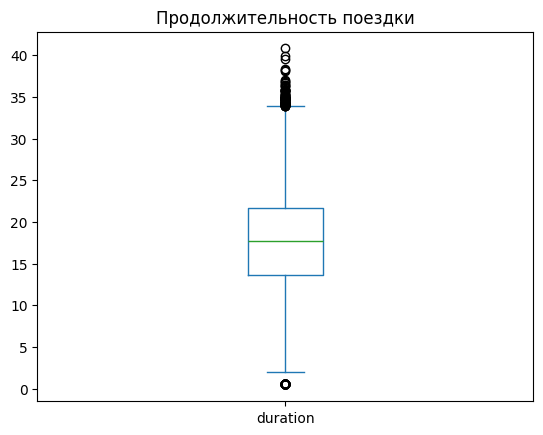

In [25]:
display(data_rides_go['duration'].describe())
data_rides_go['duration'].plot.box()
plt.title('Продолжительность поездки')
plt.show()

In [26]:
data_rides_go['distance'] = data_rides_go['distance'].round(2)
data_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


In [27]:
data_rides_go[data_rides_go['duration']<1]['duration'].count()

np.int64(95)


    
В продолжительности поездки имеются значения менее 1 минуты в количестве 95 шт - это аномально малое время, которое может повлиять на корректность исследования, предпочтительно их удалить.
    
Дальние поездки свыше 35 минут - также выходят за рамки 1,5 межквартильного размаха. Считаю, что их удалять не целесообразно, т к они вносят значительный вклад в показатель выручки.

In [28]:
data_rides_go = data_rides_go[data_rides_go['duration']>=1]
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 772.3 KB


   
В данном разделе проведена предобработка данных: дата приведена к типу даты,
    добавлен столбец месяц для последующей агрегации данных помесячно.
    
Выявлены дубликаты 31 шт, таблица очищена от дубликатов.
    
Выявлены значения менее 1 минуты продолжительности поездки  в количестве 95 шт - это аномально малое время, которое может повлиять на корректность исследования, данные поездки удалены из анализа.
    
Выявлены дальние поездки свыше 35 минут которые также выходят за рамки 1,5 межквартильного размаха. Считаю, что их удалять не целесообразно, т к они вносят значительный вклад в показатель выручки.

###  Исследовательский анализ данных


#### частота встречаемости городов
<a id='section2_id'></a>

,user_id
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


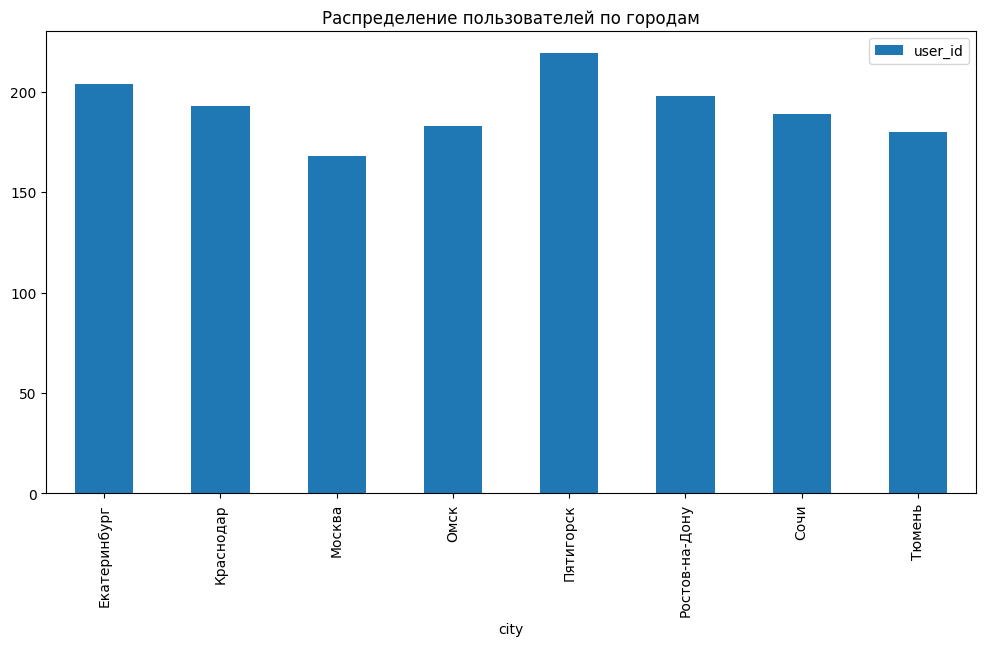

In [29]:
#частота встречаемости городов
data_users_go_pivot_city = data_users_go.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')

display(data_users_go_pivot_city)
ax = data_users_go_pivot_city.plot(kind = 'bar', figsize = (12,6))
plt.title('Распределение пользователей по городам') 

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()


    Распределение пользователей по городам примерно одинаковое, наибольшее количество в Пятигорске - 206, наименьшее в Москве  - 172.

#### Cоотношение пользователей с подпиской и без подписки
<a id='section2_id'></a>

In [30]:
#соотношение пользователей с подпиской и без подписки

data_users_pivot_subscription_type = data_users_go.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
percent_values = data_users_pivot_subscription_type.transform(lambda x: x / data_users_pivot_subscription_type['user_id'].sum())
display(data_users_pivot_subscription_type)
percent_values

,user_id
subscription_type,
free,835
ultra,699


,user_id
subscription_type,
free,0.544329
ultra,0.455671



    Пользователи с подпиской составляют порядка 46%, без подписки - 54%

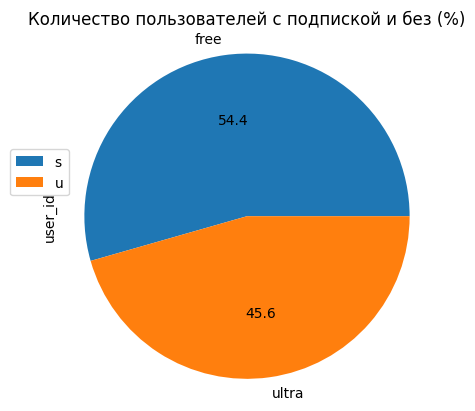

In [31]:
ax = percent_values.plot(x='subscription_type', y='user_id', kind='pie', autopct='%.1f', radius = 1.1)
plt.title('Количество пользователей c подпиской и без (%)')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'best', labels = 'subscription_type' )
plt.show()

#### возраст пользователей
<a id='section22_id'></a>

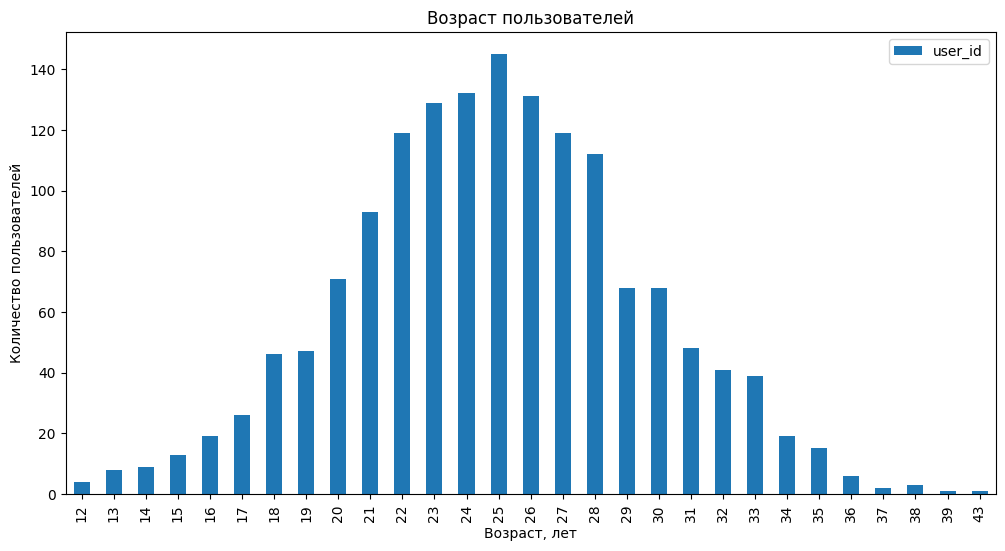

In [32]:
#возраст пользователей
data_users_go_age_pivot = data_users_go.pivot_table(index = 'age', values = 'user_id', aggfunc = 'count')
data_users_go_age_pivot.plot(kind = 'bar', figsize = (12,6))

plt.title('Возраст пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')

plt.show()

Основной диапазон пользователей от 22 до 28 лет (средний возраст 25 лет)

In [33]:
data_users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### расстояние, которое пользователь преодолел за одну поездку
<a id='section23_id'></a>

<Axes: xlabel='user_id', ylabel='distance'>

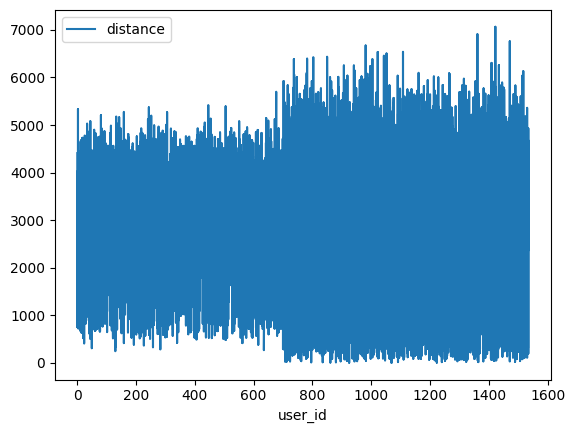

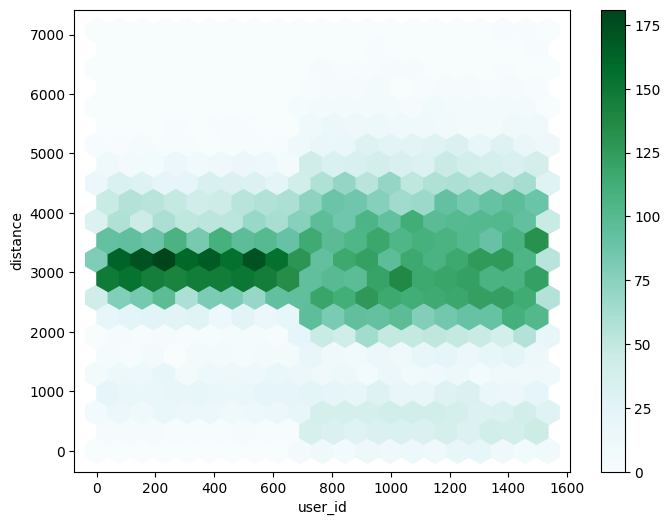

In [34]:
#расстояние, которое пользователь преодолел за одну поездку
data_rides_go.plot(x='user_id', y='distance', style = '-')
data_rides_go.plot(x='user_id', y='distance', kind = 'hexbin', gridsize = 20, figsize = (8,6), sharex = False)



    Чаще всего пользователи совершали поездку в 3-3,5 км, но есть и более дальние поездки - до 7 км, и очень короткие - 100-200 метров.

#### продолжительность поездок
<a id='section24_id'></a>

<Axes: xlabel='user_id', ylabel='duration'>

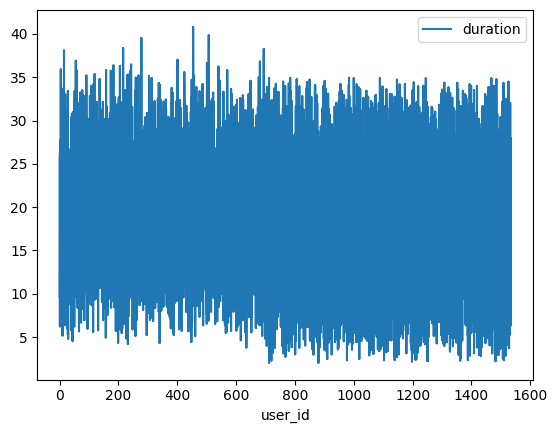

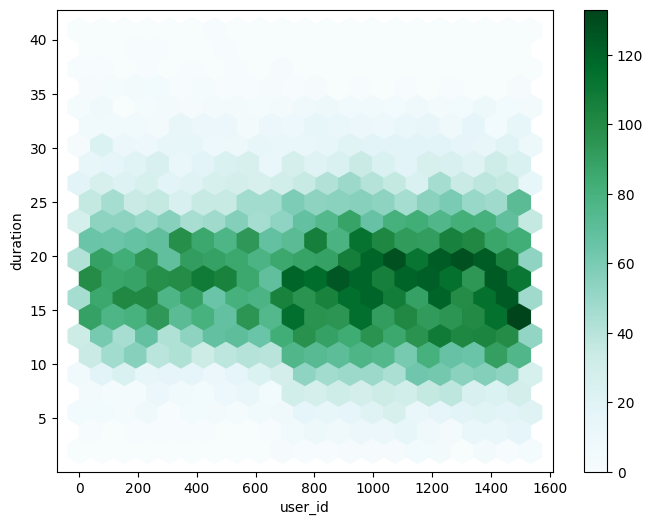

In [35]:
#продолжительность поездок
data_rides_go.plot(x='user_id', y='duration', style = '-')
data_rides_go.plot(x='user_id', y='duration', kind = 'hexbin', gridsize = 20, figsize = (8,6), sharex = False)



    Чаще всего время поездки составляло 15-20 минут, отдельные поездки - до 40 минут.

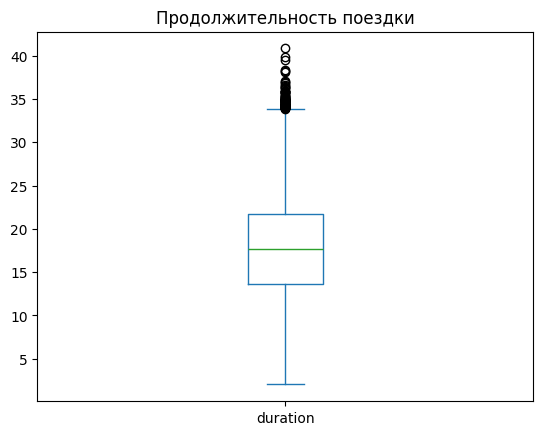

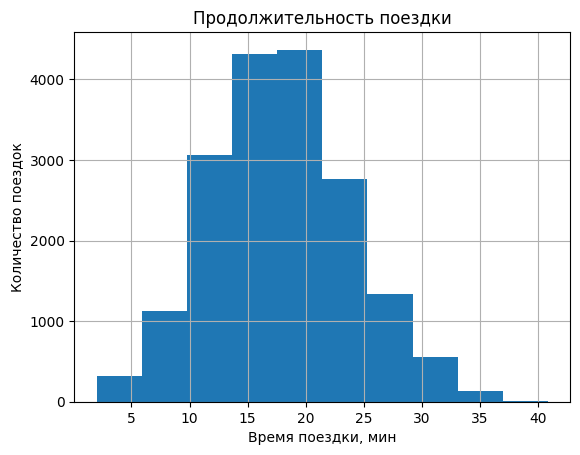

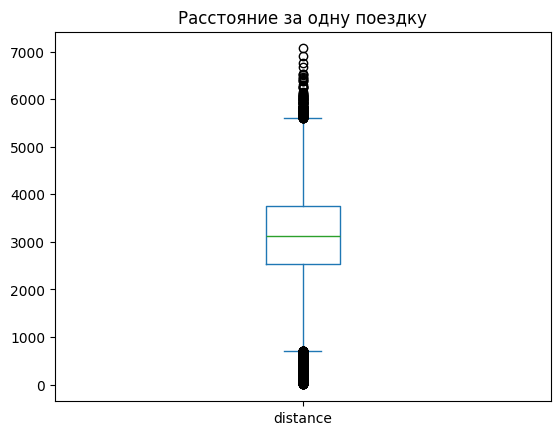

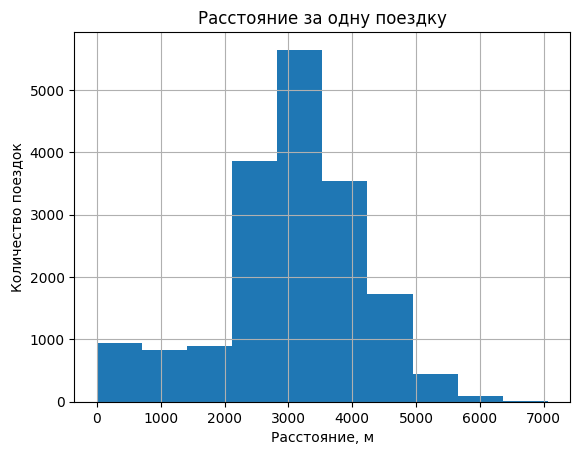

In [36]:
data_rides_go['duration'].plot.box()
plt.title('Продолжительность поездки')
plt.show()

data_rides_go['duration'].plot.hist()
plt.title('Продолжительность поездки')
plt.grid(True)
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.show()

data_rides_go['distance'].plot.box()
plt.title('Расстояние за одну поездку')
plt.show()

data_rides_go['distance'].plot.hist()
plt.title('Расстояние за одну поездку')
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

### Объединение данных
<a id='section3_id'></a>

In [37]:
print('Количество дубликатов в датафрейм с поездками', data_rides_go.duplicated().sum())
print('Количество дубликатов в датафрейм пользователи', data_users_go.duplicated().sum())

count_rides_first = data_rides_go['user_id'].count()
print('Исходное количество поездок', count_rides_first)

Количество дубликатов в датафрейм с поездками 0
Количество дубликатов в датафрейм пользователи 0
Исходное количество поездок 17973


In [38]:
#обогащение таблицы с поездками данными о пользователях и подписках (полная)
data_full = data_rides_go.merge(data_users_go, on = 'user_id', how = 'left')

data_full.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.92,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.59,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.16,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.78,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.69,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [39]:
count_rides_last = data_full['user_id'].count()
print('Количество поездок после обогащения', count_rides_first)

Количество поездок после обогащения 17973


In [40]:
data_rides_go.info()
data_full.info()
data_full['user_id'].count()

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 772.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int32         
 

np.int64(17973)

In [41]:
#срез - таблица без подписки
data_without_subscription = data_full.query('subscription_type != "ultra"')
data_without_subscription.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2515.69,14.944286,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.93,16.234663,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.43,20.016628,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.91,9.782872,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.38,17.427673,2021-02-14,2,Айдар,22,Омск,free


In [42]:
# срез - таблица с подпиской
data_subscription = data_full.query('subscription_type == "ultra"')
data_subscription.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.92,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.59,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.16,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.78,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.69,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


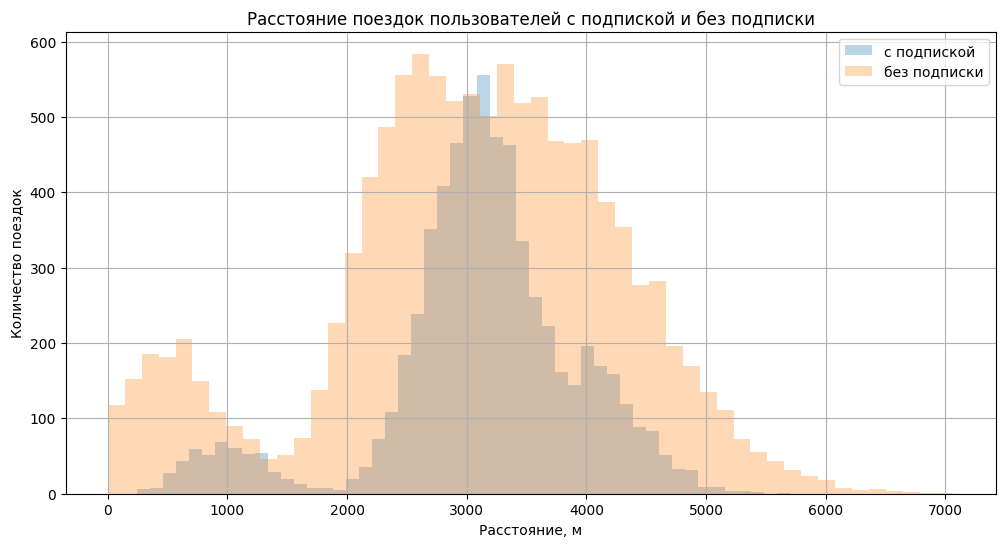

In [43]:
data_subscription['distance'].plot(kind='hist', 
                                   figsize=(12,6),
                                   bins=50, 
                                   alpha=0.3)
data_without_subscription['distance'].plot(kind='hist', 
                                    figsize=(12,6),
                                    bins=50, 
                                    alpha=0.3) 


plt.title('Расстояние поездок пользователей с подпиской и без подписки')
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(['с подпиской', 'без подписки'], loc = 'upper right')

plt.show()

Среднее расстояние пользователей с подпиской и без примерно одинаковое - 3000 метров, однако пользователи без подписки чаще совершают поездки на очень короткое расстояние (до 1000 метров).

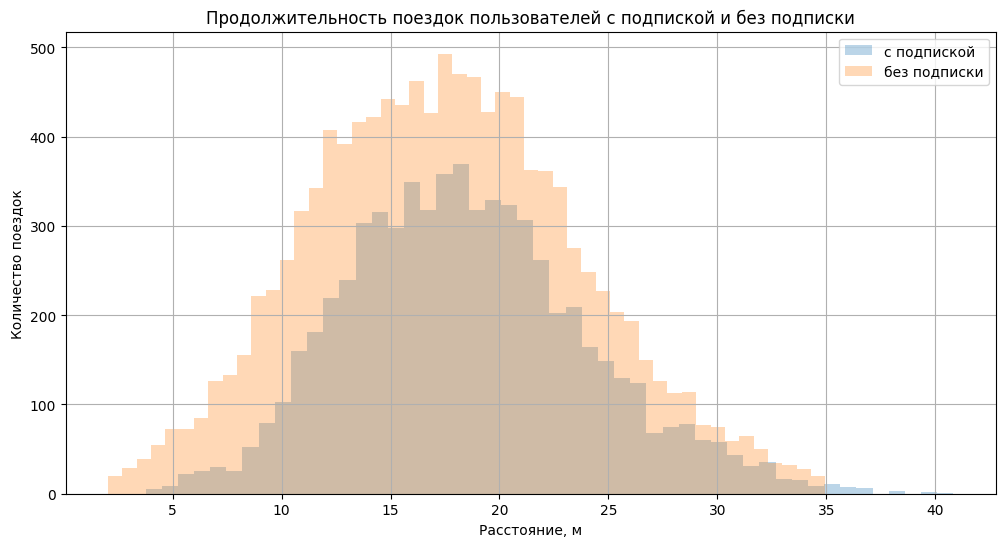

In [44]:
data_subscription['duration'].plot(kind='hist', 
                                   figsize=(12,6),
                                   bins=50, 
                                   alpha=0.3)
data_without_subscription['duration'].plot(kind='hist', 
                                    figsize=(12,6),
                                    bins=50, 
                                    alpha=0.3) 


plt.title('Продолжительность поездок пользователей с подпиской и без подписки')
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(['с подпиской', 'без подписки'], loc = 'upper right')

plt.show()

   
Среднее расстояние пользователей с подпиской и без примерно одинаковое - 3000 метров, однако пользователи без подписки чаще совершают поездки на очень короткое расстояние (до 1000 метров).
    
Среднее время поездки для пользователей с подпиской 13-23 минуты, для пользователей без подписки диапазон чуть шире - 12-24 минуты, при чем у пользователей без подписки количество коротких поездок (до 5 минут) также больше.
    Пользователи с подпиской совершали самые длительные поездки - более 35 минут.

### Подсчёт выручки
<a id='section4_id'></a>

In [45]:
# датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4 
# суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц


data_pivot_full = data_full.pivot_table(index = ['user_id', 'month','subscription_type'], values = ['distance', 'duration'], aggfunc ='sum' )
data_pivot_full = data_pivot_full.reset_index()


# каждое значение из столбца duration округляется с помощью «потолка»: 
data_pivot_full['duration'] = np.ceil(data_pivot_full['duration']) 

data_pivot_full = data_pivot_full.merge(data_subscriptions_go, on = 'subscription_type', how = 'left')
data_pivot_full

,user_id,month,subscription_type,distance,duration,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.51,42.0,6,0,199
1,1,4,ultra,754.16,7.0,6,0,199
2,1,8,ultra,6723.47,45.0,6,0,199
3,1,10,ultra,5809.91,32.0,6,0,199
4,1,11,ultra,7003.50,54.0,6,0,199
...,...,...,...,...,...,...,...,...
11295,1534,6,free,3409.47,25.0,8,50,0
11296,1534,8,free,7622.45,48.0,8,50,0
11297,1534,9,free,4928.17,23.0,8,50,0
11298,1534,11,free,13350.02,77.0,8,50,0


In [46]:
# стлб для подсчета выручки в зависимости от условий подписки
data_pivot_full['total'] = data_pivot_full['start_ride_price']+data_pivot_full['duration']*data_pivot_full['minute_price']+data_pivot_full['subscription_fee']
data_pivot_full


,user_id,month,subscription_type,distance,duration,minute_price,start_ride_price,subscription_fee,total
0,1,1,ultra,7027.51,42.0,6,0,199,451.0
1,1,4,ultra,754.16,7.0,6,0,199,241.0
2,1,8,ultra,6723.47,45.0,6,0,199,469.0
3,1,10,ultra,5809.91,32.0,6,0,199,391.0
4,1,11,ultra,7003.50,54.0,6,0,199,523.0
...,...,...,...,...,...,...,...,...,...
11295,1534,6,free,3409.47,25.0,8,50,0,250.0
11296,1534,8,free,7622.45,48.0,8,50,0,434.0
11297,1534,9,free,4928.17,23.0,8,50,0,234.0
11298,1534,11,free,13350.02,77.0,8,50,0,666.0


### Проверка гипотез


####  Тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

<a id='section51_id'></a>

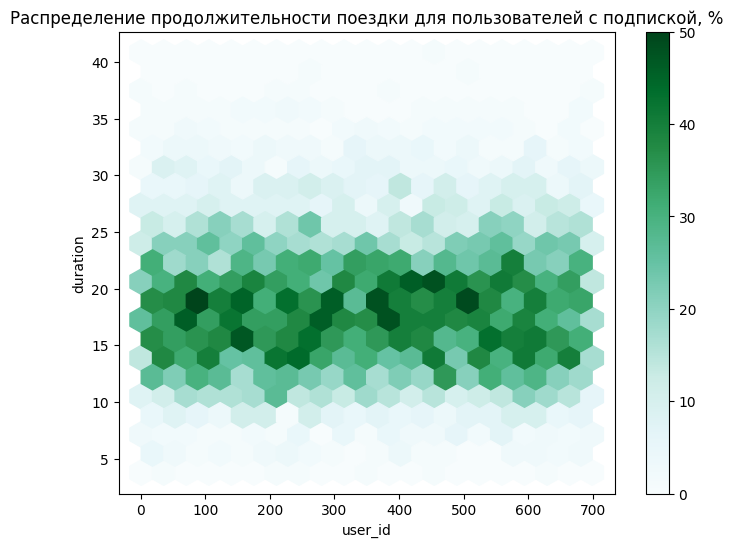

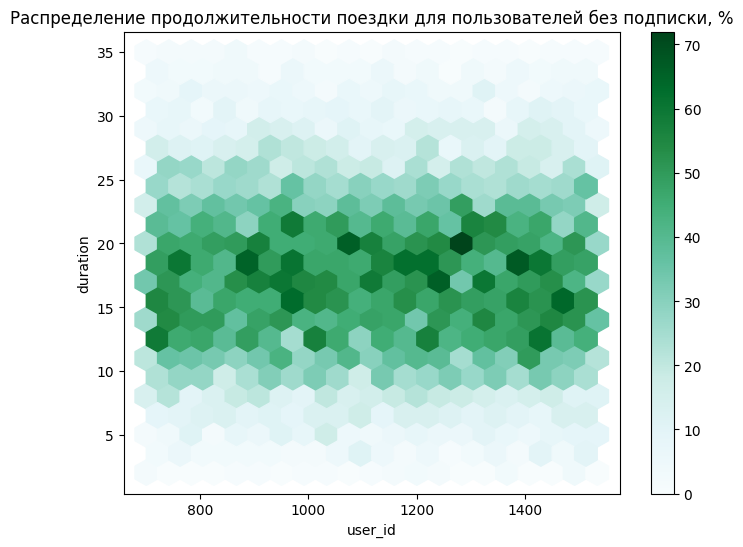

In [55]:
# Тратят ли пользователи с подпиской больше времени на поездки? 
# Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

data_subscription.plot(x='user_id', y='duration', kind = 'hexbin', gridsize = 20, figsize = (8,6), sharex = False)
plt.title('Распределение продолжительности поездки для пользователей с подпиской, %')
plt.show()
data_without_subscription.plot(x='user_id', y='duration', kind = 'hexbin', gridsize = 20, figsize = (8,6), sharex = False)
plt.title('Распределение продолжительности поездки для пользователей без подписки, %')
plt.show()

Гипотеза: Нулевая гипотеза: Среднее время продолжительности для пользователей с подпиской равно среднему времени пользователей без подписки.
Альтернативная гипотеза: Среднее время продолжительности для пользователей с подпиской больше чем среднее время пользователей без подписки 
(правосторонняя гипотеза).

In [48]:
alpha = 0.05
first_group = data_subscription['duration']
second_group = data_without_subscription['duration']
results = st.ttest_ind(first_group, second_group, alternative = 'greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.7044680744539e-28
Отвергаем нулевую гипотезу



    
Полученное значение p-value (~1.6261032773552045e-34) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что продолжительность поездок пользователей с подпиской  больше, чем без подписки.

#### Можно ли сказать, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
<a id='section52_id'></a>


Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров
Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров

In [49]:

alpha = 0.05
first_group = data_subscription['distance']

results = st.ttest_1samp(first_group, 3130, alternative = 'greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195362605842414
Нет оснований отвергнуть нулевую гипотезу



    
Полученное значение p-value (~0.9224525735508029) показывает высокую вероятность, что среднее расстояние за одну поездку составит 3130, поэтому нет оснований отвергнуть нулевую гипотезу. 
Есть основания говорить, что продолжительность поездок пользователей с подпиской  не превышает 3130.

#### Гипотеза, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
<a id='section53_id'></a>

Нулевая гипотеза: средняя выручка подписчиков равна  средней выручки без подписки
Альтернаиивная гипотеза: средняя выручка подписчиков больше  средней выручки без подписки

In [50]:

alpha = 0.05
first_group = data_pivot_full.query('subscription_type == "ultra"')['total']
second_group = data_pivot_full.query('subscription_type != "ultra"')['total']
results = st.ttest_ind(first_group, second_group, alternative = 'greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.420801680310382e-191
Отвергаем нулевую гипотезу



    
Полученное значение p-value (~1.4119059629005066e-185) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что выручка пользователей с подпиской  больше, чем без подписки.

#### Какой тест необходимо применять для проверки данных о количестве обращений до обновления сервера и после?
<a id='section54_id'></a>

In [51]:
#ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
# Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
# Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
# Какой тест вам понадобился бы для проверки этой гипотезы?


    Для проверки данных о количестве обращений до обновления сервера и после необходимо использовать тест:
    
    scipy.stats.ttest_rel
    

    
Нулевая гипотеза: ср.кол-во обращений до обновления равно ср. кол-ву обращений после обновления.
Альтернативная гипотеза: ср.кол-во обращений после обновления  меньше ср. кол-ва обращений до обновления
    
Односторонняя, less

### Шаг 7. Распределения

#### Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%

<a id='section6_id'></a>

In [52]:
# акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов 
# должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, 
# либо продлить, совершив соответствующий платёж. 

#акция уже проводилась ранее, после бесплатного пробного периода подписку продлевают 10% пользователей
#какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%, т е вероятность достичь 100 подписок равно 95%

#биномиальное распределение: раздача промокодов. Успех - продление подписки (вероятность успеха 10%)
# 

from math import sqrt
from scipy import stats as st

plan = 100
n=855 # величина n подобрана экспериментально
p = 0.1

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 100
result = distr.cdf(100)
print(result)



0.950831019027257


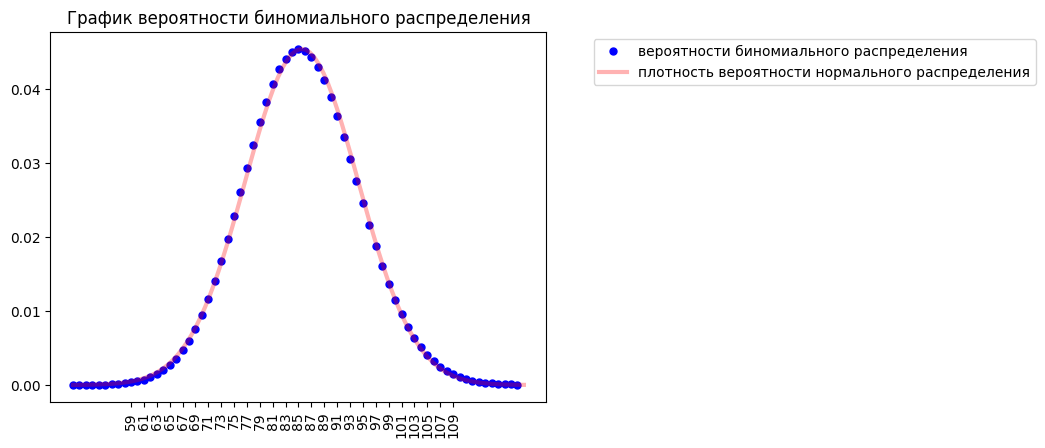

Условие выполняется


In [53]:
#проверка аппроксимации:
#если промежуток от мат.ожидания биномиального распределения плюс-минус три его стандартных отклонения выходит за пределы 
# [0,n], график биномиального распределения будет скошенным. 
# Значит, симметричная кривая нормального распределения не даст хорошей аппроксимации.

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения


import matplotlib.pyplot as plt
from scipy.stats import binom, norm
 
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 855
p = 0.10

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 2))
ax.set_xticks(x_ticks)
plt.xticks(rotation=90)
plt.title('График вероятности биномиального распределения')
# настраиваем оптимальное расположение легенды и выводим график
ax.legend(bbox_to_anchor = (1.5, 0.5, 0.5, 0.5))
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')


    Экспериментально подобрано число промокодов для раздачи (855), при котором как минимум 100 существующих клиентов должны продлить эту подписку с вероятностью 95%.

#### вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1 млн уведомлений
<a id='section7_id'></a>

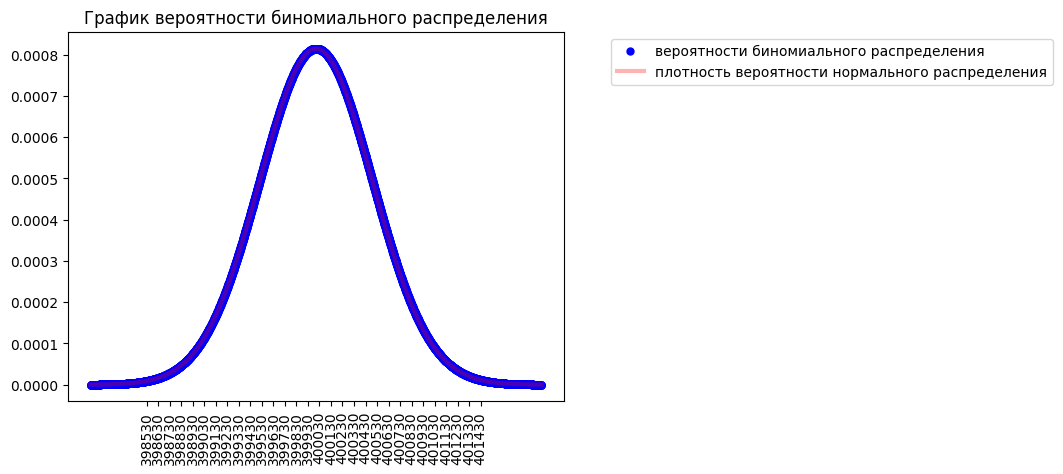

Условие выполняется
Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: 0.15371708296369768


In [54]:
# Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. 
# Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 
# С помощью аппроксимации необходимо построить примерный график распределения и оценить вероятность того, 
# что уведомление откроют не более 399,5 тыс. пользователей.

# функциz, которая выдаёт <num> чисел описана выше,

 
# задаём параметры биномиального распределения
n = 1000000
p = 0.40

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 100))
ax.set_xticks(x_ticks)
plt.xticks(rotation=90)
plt.title('График вероятности биномиального распределения')
# настраиваем оптимальное расположение легенды и выводим график
ax.legend(bbox_to_anchor = (1.5, 0.5, 0.5, 0.5))
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')
    

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399500
result = distr.cdf(399500)
print(f'Вероятность, что уведомление откроют не более 399,5 тыс. пользователей: {result}')
    


    Вероятность, что уведомление откроют не более 399,5 тыс. пользователей составляет 15%

# Выводы:
Проведен анализ данных сервиса аренды самокатов GoFast: проверка гипотез для бизнеса относительно пользователей с подпиской и без.


1. ПРоведена предобработка данных, выявлены дубликаты (31) 

2. Исследовательский анализ данных: 

   Сервис GoFast представлен в 8 городах - 
   Екатеринбург, Краснодар, Москва, Омск, Пятигорск, Ростов-на-Дону, Сочи, Тюмень.  
   Распределение пользователей по городам примерно одинаковое, наибольшее количество в Пятигорске - 206, наименьшее в Москве - 172;

   Пользователи с подпиской составляют порядка 46%, без подписки - 54%, 
   
   основная доля пользователей в возрасте от 22 до 28 лет (средний возраст 25 лет); 
   
   расстояние, которое пользователь преодолел за одну поездку:Чаще всего пользователи совершали поездку в 3-3,5 км, но есть и более дальние поездки - до 7 км, и очень короткие - 100-200 метров; 
   
   продолжительность поездок: Чаще всего время поездки составляло 15-20 минут, отдельные поездки - до 40 минут.
    
3. В целях анализа данных осуществлено объединение данных о пользователях, поездках и подписках, сделан срез пользователей с подписой и без нее.
    
4. Добавлен расчет выручки для каждого пользователя за месяц.
    
5. ПРоведена проверка гипотез:

        5.1. тратят ли пользователи с подпиской больше времени на поездки? - Есть основания говорить, что продолжительность поездок пользователей с подпиской больше, чем без подписки.
        
        
        5.2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
        3130 метров? - Есть основания говорить, что продолжительность поездок пользователей с подпиской не превышает 3130.
        
        5.3. будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. - Есть основания говорить, что выручка пользователей с подпиской  больше, чем без подписки.
        
        5.4. повлияет ли смена серверов на количество обращений в техподдержку? - Для проверки данных о количестве обращений до обновления сервера и после необходимо использовать тест scipy.stats.ttest_rel
    
6. Для акции по промокодам: какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5% - 855 промокодов.
    
7. push-уведомления в мобильном приложении: вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей при отправке 1 млн уведомлений, составляет 15%


Рекомендации    
Рекламному отделу стоит предложить диверсифицировать условия оплаты в зависимости от времени поездки, чтобы увеличить количество коротких поездок.
Или провести акцию по промокодам "Первые 3 минуты поездки бесплатно"
    